In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
variables = pd.read_csv('VariableDefinitions (1).csv')

In [3]:
variables

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, E...",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or ...,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104867 entries, 0 to 104866
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           104867 non-null  object 
 1   country      104867 non-null  object 
 2   region       104188 non-null  object 
 3   population   104867 non-null  float64
 4   age          104580 non-null  float64
 5   Q1           104867 non-null  int64  
 6   Q2           47721 non-null   float64
 7   Q3           45214 non-null   float64
 8   Q4           57445 non-null   float64
 9   Q5           57445 non-null   float64
 10  Q6           104867 non-null  int64  
 11  Q7           20641 non-null   float64
 12  Q8           59029 non-null   float64
 13  Q9           59029 non-null   float64
 14  Q10a         104867 non-null  int64  
 15  Q10b         104867 non-null  int64  
 16  Q11          104867 non-null  int64  
 17  Q12          104867 non-null  int64  
 18  Q13a         104867 non-

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44943 entries, 0 to 44942
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           44943 non-null  object 
 1   country      44943 non-null  object 
 2   region       44642 non-null  object 
 3   population   44943 non-null  float64
 4   age          44819 non-null  float64
 5   Q1           44943 non-null  int64  
 6   Q2           20416 non-null  float64
 7   Q3           19348 non-null  float64
 8   Q4           24559 non-null  float64
 9   Q5           24559 non-null  float64
 10  Q6           44943 non-null  int64  
 11  Q7           8874 non-null   float64
 12  Q8           25243 non-null  float64
 13  Q9           25243 non-null  float64
 14  Q10a         44943 non-null  int64  
 15  Q10b         44943 non-null  int64  
 16  Q11          44943 non-null  int64  
 17  Q12          44943 non-null  int64  
 18  Q13a         44943 non-null  int64  
 19  Q14 

In [5]:
train.describe()

,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
count,1.048670e+05,104580.000000,104867.000000,47721.000000,45214.000000,57445.000000,57445.000000,104867.000000,20641.000000,59029.000000,...,104867.000000,104867.000000,37580.000000,104867.000000,104867.000000,80694.000000,58429.000000,104866.000000,73862.000000,104867.000000
mean,6.728827e+07,41.820922,1.556000,1.060078,1.297784,1.618835,1.556202,1.818542,1.153772,1.220485,...,1.432052,1.650252,1.745796,1.861930,1.880801,1.855565,1.846378,1.176377,1.125586,0.581794
std,2.095529e+08,17.823733,0.522745,0.274234,0.466056,0.496068,0.509122,0.429471,0.372760,0.439298,...,0.516419,0.498633,0.452266,0.375167,0.357280,0.375795,0.393282,0.394253,0.343106,0.493267
min,3.739912e+05,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.335264e+06,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,9.386639e+06,39.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,3.051912e+07,55.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,1.134634e+09,99.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [6]:
target = train.target
# train.drop('target', axis=1, inplace=True)

<AxesSubplot:xlabel='target', ylabel='Count'>

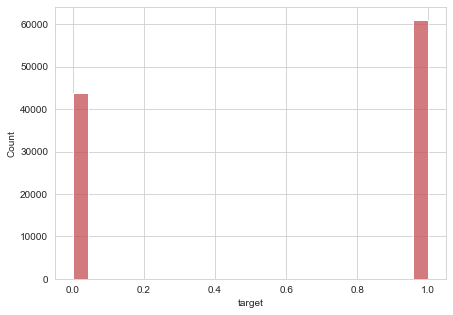

In [8]:
plt.subplots(figsize=(7, 5))
sns.set_style('whitegrid')
sns.set_color_codes(palette='deep')

sns.histplot(data=train, x='target', color='r')

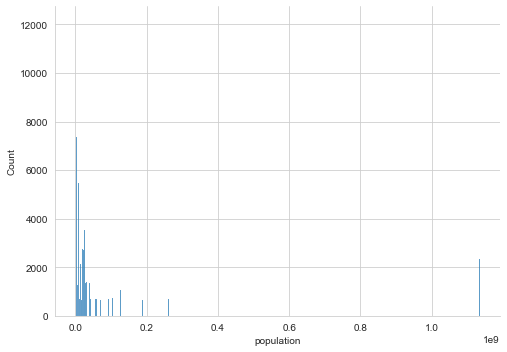

In [10]:

sns.displot(data=train , x='population', aspect=10/7)

Perform transformation on train.population

In [11]:
print(train.shape)

(104867, 36)


In [12]:
print(train.target.dtype)
train.target = train['target'].astype('object')
print(train.target.dtype)

int64
object


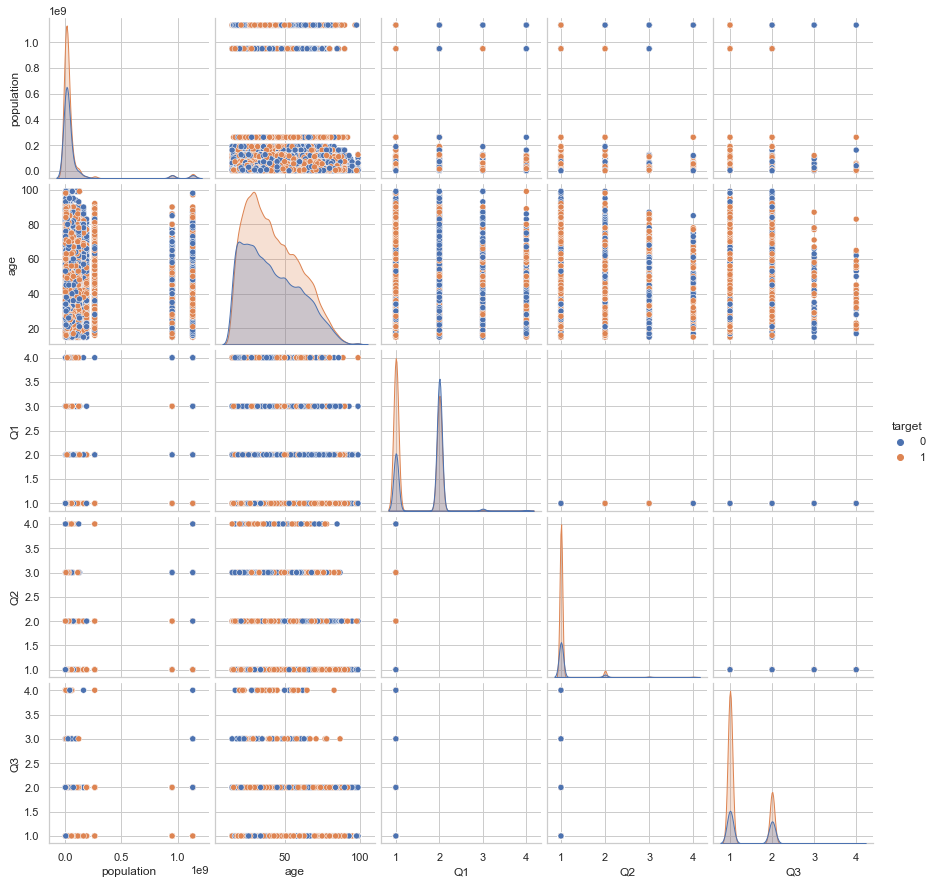

In [93]:
new_data = train.iloc[:, 0:8]
new_data['target'] = train['target']
sns.pairplot(data=new_data, hue='target')

<AxesSubplot:>

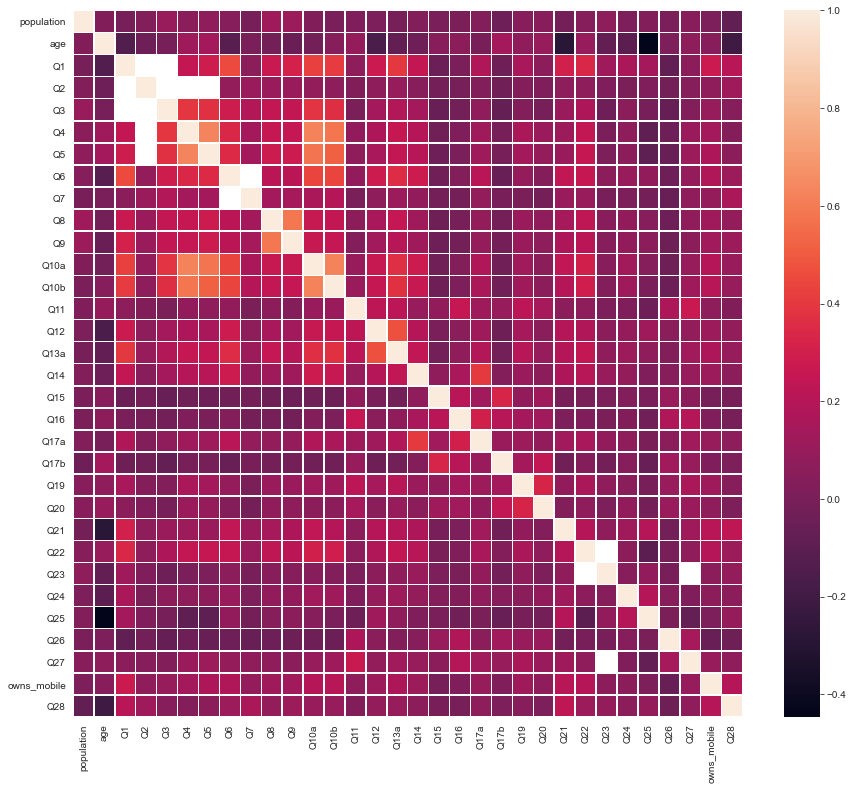

In [13]:
plt.subplots(figsize=(15, 13))

correlation = train.corr()
sns.heatmap(correlation, linewidth=0.5)

from the correlation plot, we can see regions of high correlation

No handles with labels found to put in legend.


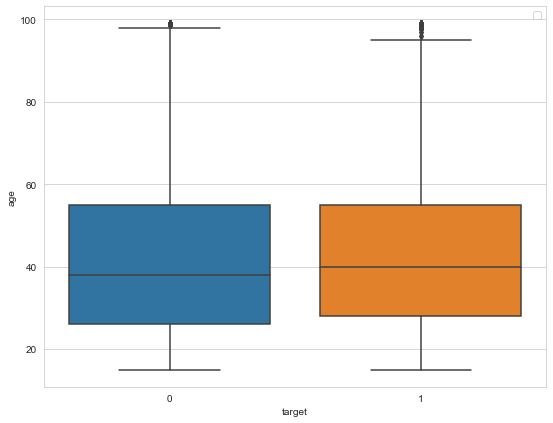

In [14]:
plt.subplots(figsize=(9, 7))
sns.set_style('whitegrid')
sns.set_color_codes(palette='deep')

sns.boxplot(data=train, x='target', y='age')
plt.legend()

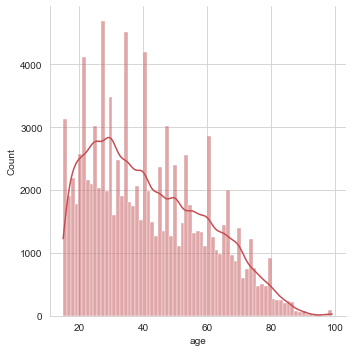

In [15]:
sns.displot(data=train, x='age', color='r', kde=True)

# dataset needs to be transformed

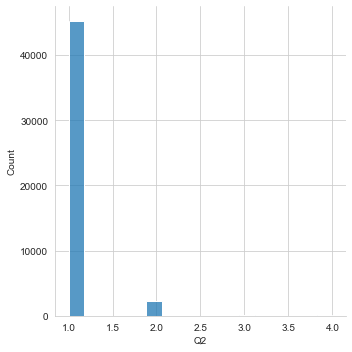

In [16]:
sns.displot(data=train, x='Q2')

### let's handle missing values

In [17]:
basic_dataset = pd.concat([train, test], axis=0).reset_index(drop=True)

print(train.shape)
print(test.shape)
print(basic_dataset.shape)

(104867, 36)
(44943, 35)
(149810, 36)


In [18]:
target = basic_dataset['target']
basic_dataset.drop('target', axis=1, inplace=True)

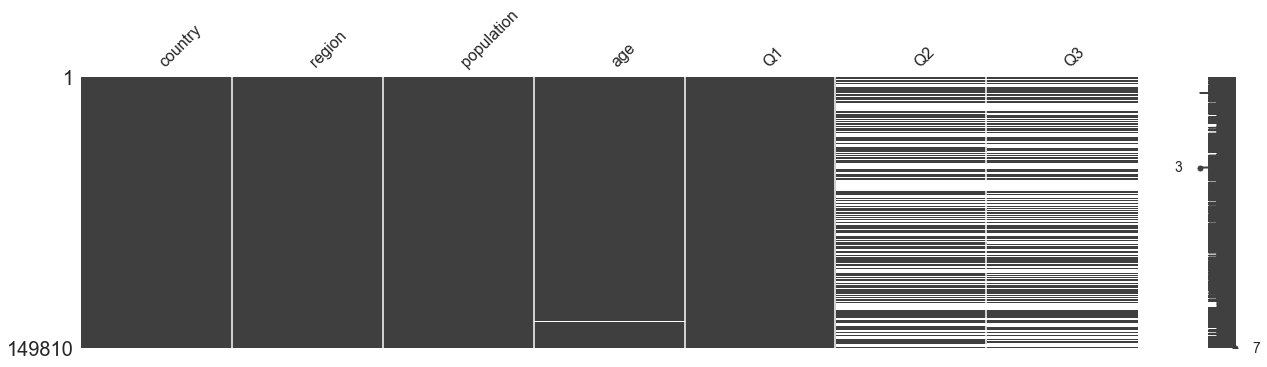

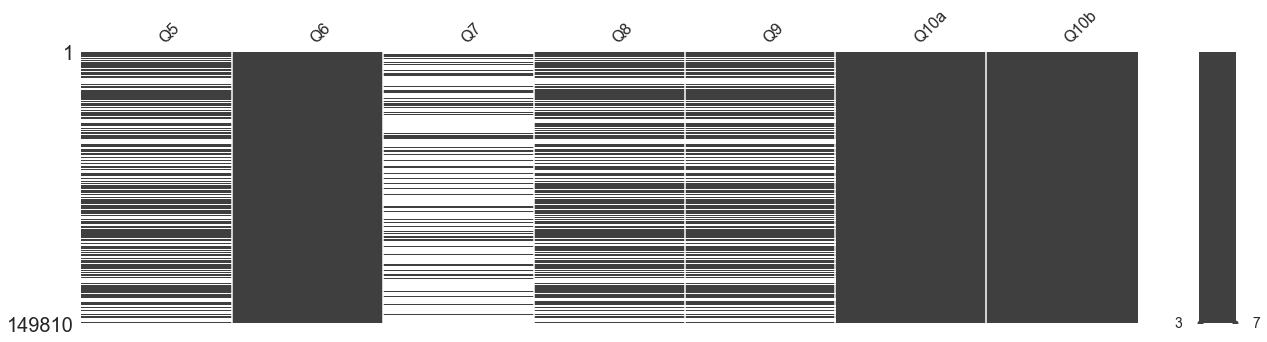

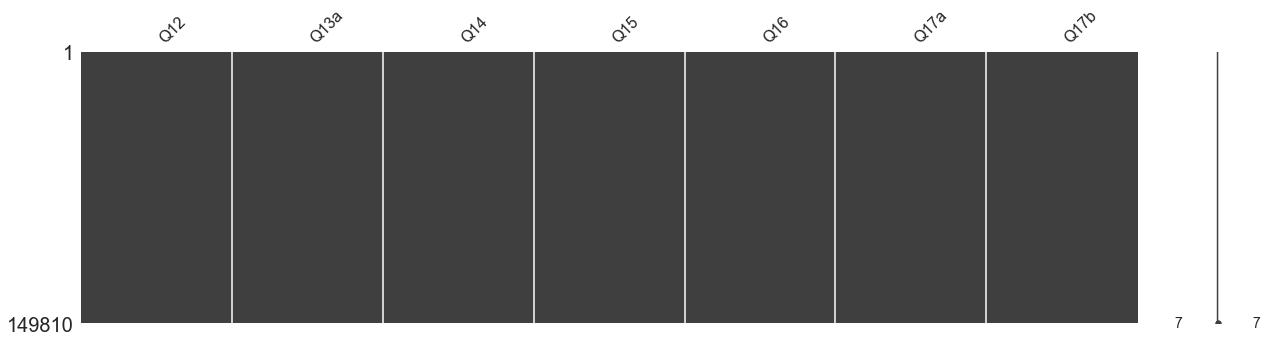

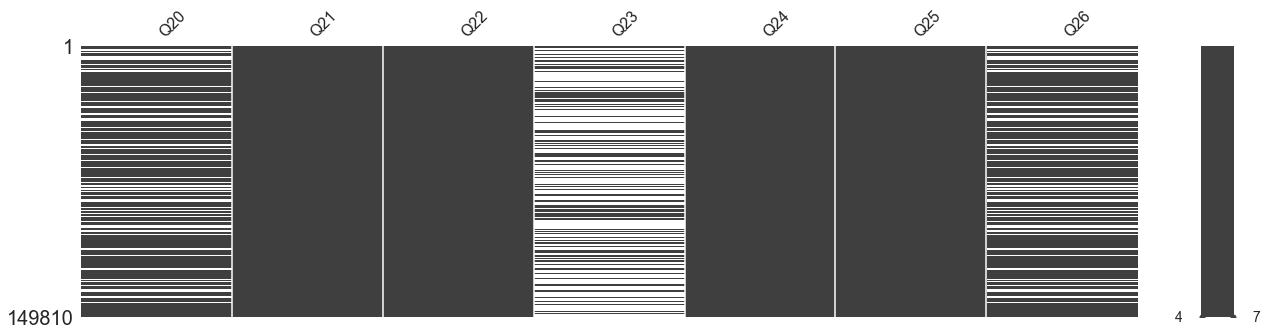

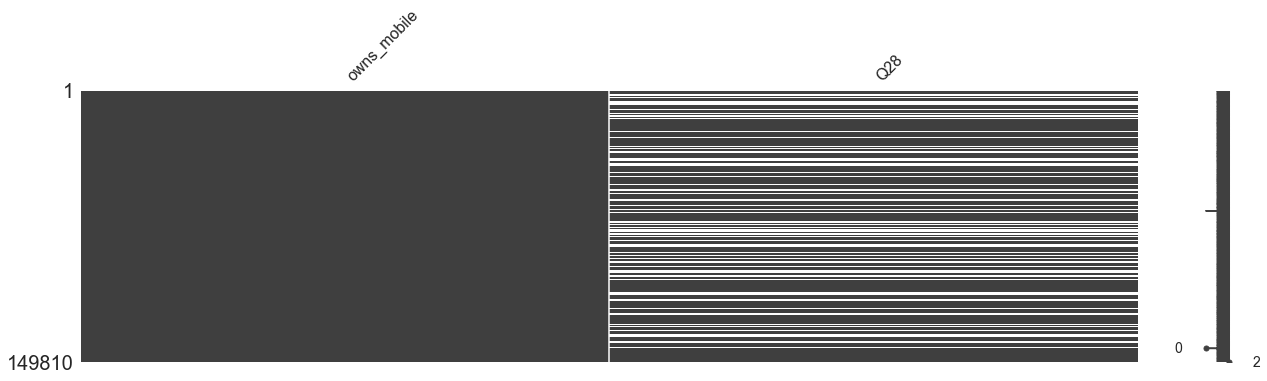

In [19]:
import missingno as msno

first_col = 1
last_col = 8
for j in range(5):
    sns.set_color_codes(palette='deep')
    sns.set_style('whitegrid')
    msno.matrix(df=basic_dataset.iloc[:, first_col:last_col] , figsize=(21, 5))
    first_col += 8
    last_col += 8

In [20]:
miss_list = []

def missing_percentage(feature):
    miss = basic_dataset[feature].isnull().sum()
    total = len(train[feature])
    result = (miss/total) * 100
    print(f'{feature} : {result} ')
    
    if result >= 40:
        miss_list.append(feature)

for i in basic_dataset.columns:
    missing_percentage(i)

ID : 0.0 
country : 0.0 
region : 0.9345170549362526 
population : 0.0 
age : 0.39192500977428557 
Q1 : 0.0 
Q2 : 77.88246064062098 
Q3 : 81.29154071347516 
Q4 : 64.659044313273 
Q5 : 64.659044313273 
Q6 : 0.0 
Q7 : 114.711968493425 
Q8 : 62.49630484327767 
Q9 : 62.49630484327767 
Q10a : 0.0 
Q10b : 0.0 
Q11 : 0.0 
Q12 : 0.0 
Q13a : 0.0 
Q14 : 0.0 
Q15 : 0.0 
Q16 : 0.0 
Q17a : 0.0 
Q17b : 0.0 
Q19 : 32.99798792756539 
Q20 : 32.99798792756539 
Q21 : 0.0 
Q22 : 0.0 
Q23 : 91.7638532617506 
Q24 : 0.0 
Q25 : 0.0 
Q26 : 32.99798792756539 
Q27 : 63.199099812143004 
owns_mobile : 0.0019071776631352094 
Q28 : 42.37558049720121 


In [21]:
miss_list

['Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q23', 'Q27', 'Q28']

In [24]:
basic_dataset.drop(miss_list, axis=1, inplace=True)
basic_dataset.shape

(149810, 25)

In [25]:
basic_dataset

,ID,country,region,population,age,Q1,Q6,Q10a,Q10b,Q11,...,Q17a,Q17b,Q19,Q20,Q21,Q22,Q24,Q25,Q26,owns_mobile
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high inc...,2.555017e+07,66.0,2,2,2,2,2,...,2,1,2.0,1.0,1,2,1,2,2.0,1.0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high inc...,4.591023e+06,44.0,2,2,2,2,2,...,1,2,2.0,2.0,1,2,2,2,2.0,1.0
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high inc...,2.555017e+07,29.0,1,2,2,2,2,...,2,2,2.0,2.0,1,1,2,2,2.0,1.0
3,ID_0000144505,Canada,High income: OECD,3.049117e+07,44.0,1,2,1,1,2,...,1,2,NaN,NaN,1,1,1,2,NaN,1.0
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),9.300232e+07,36.0,2,2,1,2,2,...,2,2,2.0,2.0,1,2,1,2,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149805,ID_9998436223,"Macedonia, FYR",Europe & Central Asia (excluding high income),1.731874e+06,60.0,1,1,2,2,1,...,2,2,2.0,2.0,1,2,2,2,2.0,1.0
149806,ID_9998690942,Dominican Republic,Latin America & Caribbean (excluding high income),7.492988e+06,59.0,1,2,2,2,2,...,2,2,2.0,1.0,1,1,2,2,2.0,1.0
149807,ID_9999258746,Lebanon,Middle East & North Africa (excluding high inc...,4.591023e+06,25.0,2,2,2,2,2,...,2,1,2.0,1.0,2,2,2,2,2.0,1.0
149808,ID_9999427887,Madagascar,Sub-Saharan Africa (excluding high income),1.461474e+07,66.0,2,2,2,2,2,...,2,1,1.0,2.0,1,2,2,2,2.0,2.0


In [26]:
basic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           149810 non-null  object 
 1   country      149810 non-null  object 
 2   region       148830 non-null  object 
 3   population   149810 non-null  float64
 4   age          149399 non-null  float64
 5   Q1           149810 non-null  int64  
 6   Q6           149810 non-null  int64  
 7   Q10a         149810 non-null  int64  
 8   Q10b         149810 non-null  int64  
 9   Q11          149810 non-null  int64  
 10  Q12          149810 non-null  int64  
 11  Q13a         149810 non-null  int64  
 12  Q14          149810 non-null  int64  
 13  Q15          149810 non-null  int64  
 14  Q16          149810 non-null  int64  
 15  Q17a         149810 non-null  int64  
 16  Q17b         149810 non-null  int64  
 17  Q19          115206 non-null  float64
 18  Q20          115206 non-

fit dataset with variables as numerical and categorical

In [28]:
basic_dataset_ID = basic_dataset.ID
basic_dataset.drop('ID', axis=1, inplace=True)

### FEAUTURE ENGINEERING

getting a benchmark before actual feauture engineering

In [35]:
train.shape

(104867, 36)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import auc, roc_curve

Log_X = basic_dataset.iloc[:104867, :]
Log_Y = target.iloc[:104867]

def score(y_predicted, y_actual):
    fpr , tpr , threshold = roc_curve(y_actual, y_predicted)
#     print(f'fpr: {fpr}')
#     print(f'tpr: {tpr}')
    
    new_score = auc(fpr, tpr)
    print(new_score)

# enc = OrdinalEncoder()
# X_encoded = enc.fit_transform(Log_X)

numerical = [x for x in Log_X.columns if Log_X[x].dtype in ['float64', 'int64']]
cat = [x for x in Log_X.columns if Log_X[x].dtype == 'object']


In [138]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

imp = SimpleImputer(missing_values=np.nan , strategy='median')
Log_X[numerical] = imp.fit_transform(Log_X[numerical])


<ipython-input-138-3d594883e719>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Log_X[numerical] = imp.fit_transform(Log_X[numerical])
C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [139]:
Log_X['region'].fillna('Sub-Saharan Africa (excluding high income)', inplace=True)

cat_enc = pd.get_dummies(Log_X[cat])
Log_X = pd.concat([cat_enc, Log_X], axis=1)
Log_X.drop(cat, inplace=True, axis=1)

C:\Users\Swimming In Glory\anaconda3\envs\condaenv\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


looking at numerical distribution of age and population

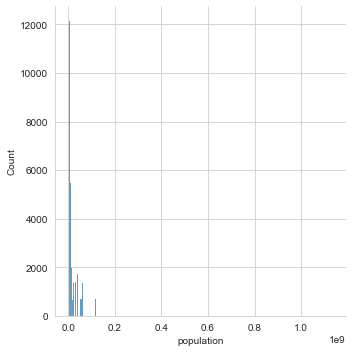

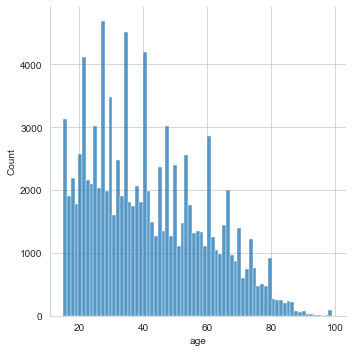

In [151]:

sns.displot(data=Log_X, x='population', label='population')

sns.displot(data=Log_X, x='age', label='age')

In [168]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox', standardize=True)

Log_X[['age', 'population']] = pt.fit_transform(Log_X[['age', 'population']])

In [169]:
X_train, X_val, Y_train, Y_val = train_test_split(Log_X, Log_Y, test_size=0.4)

In [200]:
Y_train = Y_train.astype('int64')
Y_val = Y_val.astype('int64')

In [234]:
from sklearn.ensemble import RandomForestClassifier

base_rndf = RandomForestClassifier(n_estimators=5, max_depth=20, random_state=0)
base_rndf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=5, random_state=0)

In [201]:
from catboost import CatBoostClassifier

basic_catboost = CatBoostClassifier(
    random_seed = 0,
    logging_level = 'Silent',
    custom_loss = ['Logloss']
)

In [202]:
basic_catboost.fit(X_train, Y_train, eval_set = (X_val, Y_val))

In [236]:
rndf_pred = base_rndf.predict_proba(X_val)[:, 1]
# cat_boost_pred = basic_catboost.predict_proba(X_val)[:, 1]


In [237]:
score(rndf_pred, Y_val)
# score(cat_boost_pred, Y_val)

0.7629639852586112


In [253]:
importances = base_rndf.feature_importances_

indices = np.argsort(importances)[::-1]

std = np.std([tree.feature_importances_ for tree in base_rndf.estimators_],
             axis=0)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 153 (0.106009)
2. feature 154 (0.087667)
3. feature 155 (0.080555)
4. feature 160 (0.061123)
5. feature 173 (0.045684)
6. feature 152 (0.043075)
7. feature 159 (0.042365)
8. feature 166 (0.035408)
9. feature 146 (0.034037)
10. feature 157 (0.028158)
11. feature 158 (0.027123)
12. feature 168 (0.027062)
13. feature 156 (0.022099)
14. feature 169 (0.021986)
15. feature 165 (0.021347)
16. feature 162 (0.016874)
17. feature 170 (0.016721)
18. feature 167 (0.014366)
19. feature 161 (0.014215)
20. feature 172 (0.013915)
21. feature 171 (0.013836)
22. feature 164 (0.012806)
23. feature 151 (0.011829)
24. feature 163 (0.009197)
25. feature 145 (0.009060)
26. feature 142 (0.006331)
27. feature 148 (0.004781)
28. feature 147 (0.004014)
29. feature 93 (0.003870)
30. feature 15 (0.003404)
31. feature 144 (0.003393)
32. feature 73 (0.003151)
33. feature 85 (0.003098)
34. feature 105 (0.003034)
35. feature 71 (0.002759)
36. feature 92 (0.002709)
37. feature 149 (0.002661)

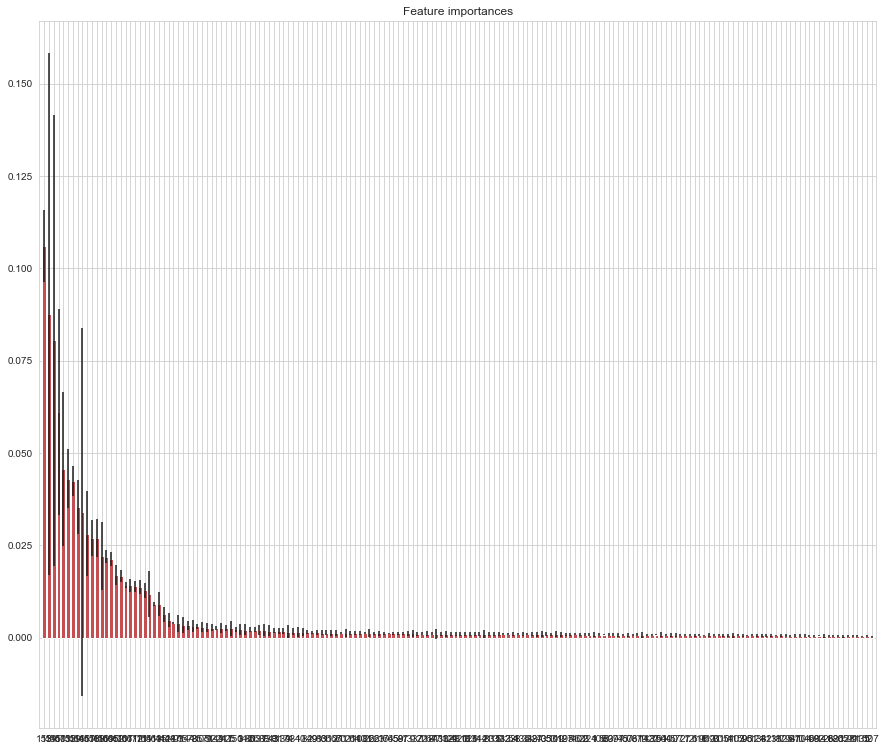

In [247]:
plt.figure(figsize=(15, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [22]:
Q2_missing = train['Q2'].isnull()
Q3_missing = train['Q3'].isnull()
Q4_missing = train['Q4'].isnull()
Q5_missing = train['Q5'].isnull()
Q7_missing = train['Q7'].isnull()
Q8_missing = train['Q8'].isnull()
Q9_missing = train['Q9'].isnull()
Q23_missing = train['Q23'].isnull()
Q27_missing = train['Q27'].isnull()
Q28_missing = train['Q28'].isnull()

# SECOND TRY : )

In [255]:
basic_dataset.isnull().sum()

country            0
region           301
population         0
age              124
Q1                 0
Q6                 0
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            10431
Q20            10431
Q21                0
Q22                0
Q24                0
Q25                0
Q26            10431
owns_mobile        1
dtype: int64

In [344]:
f_dataset = train

f_d_cat = [x for x in f_dataset.columns if f_dataset[x].dtype == 'object']
f_d_num = [x for x in f_dataset.columns if f_dataset[x].dtype in ['float', 'int64']]

f_dataset.fillna(-999, inplace=True)

# target = f_dataset['target']
# f_dataset.drop('target', axis=1, inplace=True)

fx_train , fx_val , fy_train, fy_val = train_test_split(f_dataset, target, test_size=0.3)

f_model = CatBoostClassifier(
    custom_loss = ['Logloss'],
    random_seed = 0,
    logging_level = 'Silent',
)
fy_train = fy_train.astype('int64')
fy_val = fy_val.astype('int64')


In [334]:
f_dataset[f_d_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104867 entries, 0 to 104866
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ID       104867 non-null  object
 1   country  104867 non-null  object
 2   region   104867 non-null  object
dtypes: object(3)
memory usage: 2.4+ MB


In [340]:
f_model.fit(fx_train, fy_train,
               cat_features = f_d_cat,
               eval_set = (fx_val, fy_val))

f_pred = f_model.predict_proba(X_val)[:, 1]
score(f_pred, Y_val)


CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=2]=22986556.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

### BASIC DATASET

In [261]:
basic_dataset.drop(['Q19', 'Q20', 'Q26'], axis=1, inplace=True)

In [266]:
basic_dataset['region'].fillna('Sub-Saharan Africa (excluding high income)', inplace=True)

In [274]:
basic_dataset['age'].fillna(basic_dataset['age'].mean() , inplace=True)
basic_dataset['owns_mobile'].fillna(basic_dataset['owns_mobile'].median(), inplace=True)

In [303]:
basic_dataset['id'] = basic_dataset_ID

In [304]:
# basic_dataset_ID

X = basic_dataset.iloc[:104867, :]
Y = target.iloc[:104867]

Y = Y.astype('int')

In [305]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3)

In [306]:
cat = [i for i in X.columns if X[i].dtype == 'object']
cat

['country', 'region', 'id']

In [307]:
cat_model = CatBoostClassifier(
    random_seed = 0,
    logging_level = 'Silent',
    custom_loss = ['Logloss'],
    cat_features = cat
)

In [308]:
cat_model.fit(X_train, Y_train, eval_set = (X_val, Y_val))

In [309]:
get = cat_model.predict_proba(X_val)[:, 1]
score(get, Y_val)

# score(Y, cat_model.predict_proba(X_val)[:, 1])

0.7895046397151313
